### Introduction
- Project's title: Heart rate prediction to monitoring stress level for Zentria app
- Creation Date: 05/03/2023
- Author: Team PlaceHolder - UNIHACK 2023
- Dataset: Mental Stress PPG: https://www.kaggle.com/datasets/chtalhaanwar/mental-stress-ppg


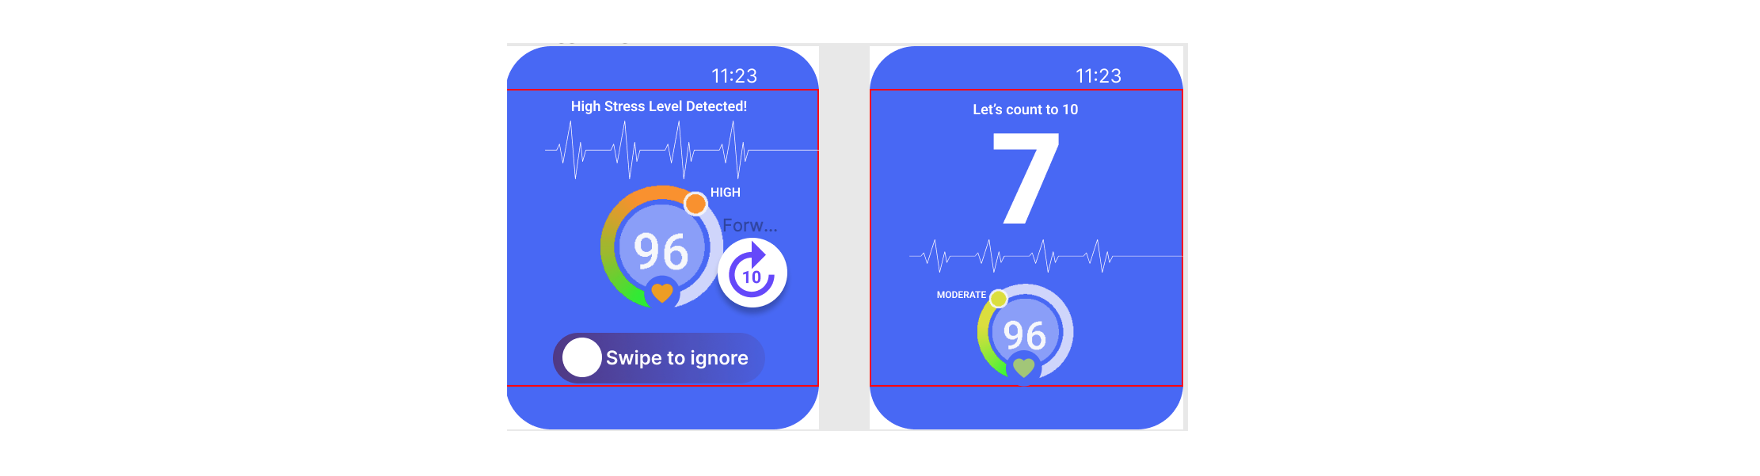

In [ ]:
%%capture
!pip install antropy -q

### Import  basic libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import statistics as st
from antropy import *


### Read file

In [ ]:
df=pd.read_csv('../input/mental-stress-ppg/data.csv')
df.head()

,subject ID,labels,0,1,2,3,4,5,6,7,...,672,673,674,675,676,677,678,679,680,681
0,sub_1,normal,640.0,636.0,630.0,656.0,670.0,644.0,660.0,608.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,sub_2,normal,656.0,640.0,648.0,622.0,628.0,644.0,648.0,698.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,sub_3,normal,572.0,564.0,550.0,526.0,524.0,510.0,502.0,496.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,sub_4,normal,298.0,538.0,322.0,532.0,874.0,850.0,824.0,854.0,...,806.0,812.0,814.0,790.0,740.0,716.0,724.0,720.0,710.0,708.0
4,sub_5,normal,630.0,616.0,598.0,638.0,626.0,616.0,594.0,620.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Seprate data and labels. the first column correponds to label

In [ ]:
data=df.iloc[:,2::].T
labels=df.iloc[:,1].T

#### Print first five and last 5 rows of data and labels

In [ ]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,640.0,656.0,572.0,298.0,630.0,618.0,632.0,330.0,426.0,662.0,...,658.0,580.0,256.0,630.0,614.0,716.0,740.0,660.0,748.0,850.0
1,636.0,640.0,564.0,538.0,616.0,638.0,670.0,624.0,774.0,668.0,...,694.0,566.0,502.0,622.0,570.0,738.0,784.0,640.0,728.0,796.0
2,630.0,648.0,550.0,322.0,598.0,2030.0,724.0,740.0,748.0,742.0,...,636.0,576.0,302.0,602.0,566.0,724.0,798.0,662.0,744.0,816.0
3,656.0,622.0,526.0,532.0,638.0,1330.0,700.0,772.0,666.0,760.0,...,600.0,598.0,504.0,586.0,618.0,682.0,806.0,676.0,762.0,846.0
4,670.0,628.0,524.0,874.0,626.0,1432.0,740.0,690.0,664.0,732.0,...,628.0,624.0,302.0,594.0,630.0,674.0,816.0,660.0,714.0,804.0


In [ ]:
labels.head()

0    normal
1    normal
2    normal
3    normal
4    normal
Name: labels, dtype: object

### Remove missing values columns
remove columns having missing/NaN values. Hint use pandas dropna. check dropna attributes:
how,inplace,axis

In [ ]:
data.dropna(how='any',inplace=True,axis=0)

In [ ]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,640.0,656.0,572.0,298.0,630.0,618.0,632.0,330.0,426.0,662.0,...,658.0,580.0,256.0,630.0,614.0,716.0,740.0,660.0,748.0,850.0
1,636.0,640.0,564.0,538.0,616.0,638.0,670.0,624.0,774.0,668.0,...,694.0,566.0,502.0,622.0,570.0,738.0,784.0,640.0,728.0,796.0
2,630.0,648.0,550.0,322.0,598.0,2030.0,724.0,740.0,748.0,742.0,...,636.0,576.0,302.0,602.0,566.0,724.0,798.0,662.0,744.0,816.0
3,656.0,622.0,526.0,532.0,638.0,1330.0,700.0,772.0,666.0,760.0,...,600.0,598.0,504.0,586.0,618.0,682.0,806.0,676.0,762.0,846.0
4,670.0,628.0,524.0,874.0,626.0,1432.0,740.0,690.0,664.0,732.0,...,628.0,624.0,302.0,594.0,630.0,674.0,816.0,660.0,714.0,804.0


In [ ]:
data.shape

(337, 54)

### Plot the data 


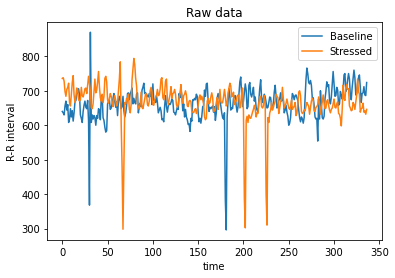

In [ ]:
plt.plot(data.iloc[:,0:1].values,label='Baseline'); #PLOT 
plt.plot(data.iloc[:,27:28].values,label='Stressed');
plt.xlabel('time')
plt.ylabel('R-R interval')
plt.title('Raw data')
plt.legend()


### Remove Outliers
remove outliers, such as value greater than 1000 and lower than 600. you can either do it using 
pandas or numpy . you can use a better strategy such as inter quartile range

In [ ]:
data=np.where((data.values > 1000) | (data.values<600), np.median(data.values), data.values)


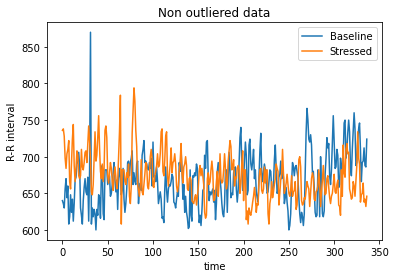

In [ ]:
plt.plot(data[:,0:1],label='Baseline'); #PLOT 
plt.plot(data[:,27:28],label='Stressed');
plt.xlabel('time')

plt.ylabel('R-R interval')
plt.title('Non outliered data')
plt.legend()

### Apply filter to the data
apply any smoothening filter such as Savitzky-Golay filter or moving average filter

In [ ]:
from scipy.signal import savgol_filter
data=savgol_filter(data,5,3)

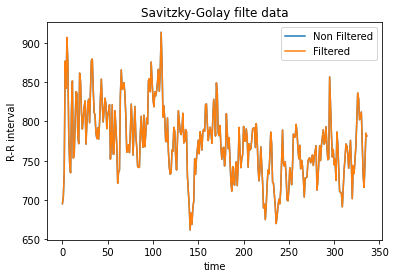

In [ ]:
plt.plot(data[:,10:11],label='Non Filtered'); #PLOT 
plt.plot(data[:,10:11],label='Filtered');
plt.xlabel('time')
plt.ylabel('R-R interval')
plt.title('Savitzky-Golay filte data')
plt.legend()

## Calculate features

calculate following features.
* mean
* median
* maximum
* variance
* standard deviation
* maximum
* minimum
* and the following

In [ ]:
def ranges(x):
    return x.max() - x.min()

def rmssd(x):
    return np.sqrt(np.mean(np.diff(x) ** 2))
def sdsd(x):
    return st.stdev(np.diff(x))
    
def nni_50(x):
    return  sum(np.abs(np.diff(x)) > 50)

def pnni_50(x):
    return 100 * nni_50(x) / len(x)

def nni_20(x):
    return sum(np.abs(np.diff(x)) > 20)

def pnni_20(x):
    return  100 * nni_20(x) / len(x)

def avg_hr(x):
    return  st.mean(60000/x)
def std_hr(x):
    return  st.stdev(60000/x)
def min_hr(x):
    return  min(60000/x)
def max_hr(x):
    return  max(60000/x)

def energy(x):
    return sum(np.square(x))

def abs_sum_diff(x):
#     sum of absolute differences (SAD) is a measure of the similarity between signal
    return sum(np.abs(np.diff(x)))




In [ ]:
data=pd.DataFrame(data)
time_features=data.agg([np.mean,np.var, np.median,np.max,np.min,
                   ranges,rmssd,sdsd,nni_50,pnni_50,nni_20,pnni_20,
                        avg_hr,std_hr,min_hr,max_hr,
                        energy,abs_sum_diff,

                       ],axis=0)

In [ ]:
time_features.head()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
mean,676.403985,646.241628,717.029250,715.338364,720.281136,691.442476,756.752692,735.307673,717.297160,713.963205,...,666.037134,711.997626,707.617465,686.592794,666.277575,726.617550,723.719033,687.560322,681.282238,807.094871
var,1266.766605,1100.708799,595.708688,547.531022,912.999250,2014.501827,3193.235705,2753.972463,2391.441620,2065.388331,...,969.133845,844.553989,874.253173,648.804984,639.147028,862.646185,643.497606,633.434048,1745.344947,898.146038
median,678.257143,645.428571,717.142857,717.142857,719.200000,684.628571,748.457143,729.828571,710.171429,706.114286,...,662.057143,714.228571,710.000000,687.885714,668.628571,727.771429,724.514286,687.828571,679.371429,805.971429
amax,869.200000,760.457143,788.114286,775.657143,808.457143,860.742857,984.000000,929.257143,928.342857,844.628571,...,747.942857,799.428571,790.000000,755.200000,730.000000,808.285714,812.000000,771.085714,782.742857,897.485714
amin,607.685714,574.628571,636.114286,642.685714,635.885714,594.914286,633.714286,628.057143,620.800000,618.171429,...,580.000000,638.000000,630.571429,622.628571,598.571429,631.314286,655.657143,607.771429,591.314286,709.514286


## Frequency features

In [ ]:
from scipy import signal
from scipy.ndimage import label
from scipy.stats import zscore
from scipy.interpolate import interp1d
from scipy.integrate import trapz

In [ ]:
data.shape,len(data)

((337, 54), 337)

In [ ]:
rr_interpolated=[]
for i in range(len(data)):
    rr_manual=data.T[i]
    x = np.cumsum(rr_manual) / 1000.0#cumulative sum of data
    f = interp1d(x, rr_manual, kind='cubic',fill_value="extrapolate")#extra polation 
    fs = 4.0#new sampling frequency
    steps = 1 / fs

    # now we can sample from interpolation function
    xx = np.arange(1, np.max(x), steps)
    rr_interpolated.append(f(xx))


In [ ]:
len(rr_interpolated),rr_interpolated[0].shape,rr_interpolated[27].shape,data.shape

(337, (146,), (149,), (337, 54))

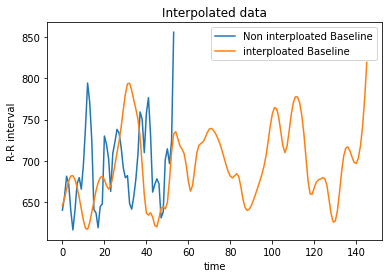

In [ ]:
plt.plot(data.iloc[0],label='Non interploated Baseline'); #PLOT 
plt.plot(rr_interpolated[0],label='interploated Baseline');
plt.xlabel('time')
plt.ylabel('R-R interval')
plt.title('Interpolated data')
plt.legend()

In [ ]:
def frequency_domain(rri, fs=4):
    # Estimate the spectral density using Welch's method
    fxx, pxx = signal.welch(x=rri, fs=fs)
    
    '''
    Segement found frequencies in the bands 
     - Very Low Frequency (VLF): 0-0.04Hz 
     - Low Frequency (LF): 0.04-0.15Hz 
     - High Frequency (HF): 0.15-0.4Hz
    '''
    cond_vlf = (fxx >= 0) & (fxx < 0.04)
    cond_lf = (fxx >= 0.04) & (fxx < 0.15)
    cond_hf = (fxx >= 0.15) & (fxx < 0.4)
    
    # calculate power in each band by integrating the spectral density 
    vlf = trapz(pxx[cond_vlf], fxx[cond_vlf])
    lf = trapz(pxx[cond_lf], fxx[cond_lf])
    hf = trapz(pxx[cond_hf], fxx[cond_hf])
    
    # sum these up to get total power
    total_power = vlf + lf + hf

    # find which frequency has the most power in each band
    peak_vlf = fxx[cond_vlf][np.argmax(pxx[cond_vlf])]
    peak_lf = fxx[cond_lf][np.argmax(pxx[cond_lf])]
    peak_hf = fxx[cond_hf][np.argmax(pxx[cond_hf])]

    # fraction of lf and hf
    lf_nu = 100 * lf / (lf + hf)
    hf_nu = 100 * hf / (lf + hf)
    result=[vlf,lf,hf,total_power,lf/hf,peak_vlf,peak_lf,peak_hf,lf_nu,hf_nu]
    return np.array(result),fxx, pxx



In [ ]:
x=rr_interpolated[0]

In [ ]:
freq_feat=[]
for i in range(len(data.T)):
    results, fxx, pxx = frequency_domain(rr_interpolated[i])
    freq_feat.append(results)


/opt/conda/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 146, using nperseg = 146
  .format(nperseg, input_length))
/opt/conda/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 149, using nperseg = 149
  .format(nperseg, input_length))
/opt/conda/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 148, using nperseg = 148
  .format(nperseg, input_length))
/opt/conda/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 151, using nperseg = 151
  .format(nperseg, input_length))
/opt/conda/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 152, using nperseg = 152
  .format(nperseg, input_length))
/opt/conda/lib/python3.7/site-packages/scipy/signal/spectral

In [ ]:
np.array(freq_feat).shape

(54, 10)

In [ ]:
freq_col=['vlf','lf','hf','tot_pow','lf_hf_ratio','peak_vlf','peak_lf','peak_hf','lf_nu','hf_nu']
freq_features=pd.DataFrame(freq_feat,columns=freq_col)
freq_features.head()

,vlf,lf,hf,tot_pow,lf_hf_ratio,peak_vlf,peak_lf,peak_hf,lf_nu,hf_nu
0,12.642281,837.856083,479.137346,1329.635709,1.748676,0.027397,0.109589,0.191781,63.618851,36.381149
1,35.429426,1577.964031,1098.280160,2711.673617,1.436759,0.026846,0.107383,0.241611,58.961885,41.038115
2,38.128145,1390.774003,956.533677,2385.435825,1.453973,0.026846,0.107383,0.241611,59.249753,40.750247
3,158.514759,1594.136142,728.255045,2480.905946,2.188981,0.027027,0.108108,0.297297,68.642017,31.357983
4,105.833507,362.917753,723.344420,1192.095680,0.501722,0.026846,0.053691,0.322148,33.409776,66.590224


In [ ]:
features=pd.concat([time_features.T,freq_features],axis=1)
features.head()

,mean,var,median,amax,amin,ranges,rmssd,sdsd,nni_50,pnni_50,...,vlf,lf,hf,tot_pow,lf_hf_ratio,peak_vlf,peak_lf,peak_hf,lf_nu,hf_nu
0,676.403985,1266.766605,678.257143,869.200000,607.685714,261.514286,31.752056,31.798301,25.0,7.418398,...,12.642281,837.856083,479.137346,1329.635709,1.748676,0.027397,0.109589,0.191781,63.618851,36.381149
1,646.241628,1100.708799,645.428571,760.457143,574.628571,185.828571,25.236825,25.274390,14.0,4.154303,...,35.429426,1577.964031,1098.280160,2711.673617,1.436759,0.026846,0.107383,0.241611,58.961885,41.038115
2,717.029250,595.708688,717.142857,788.114286,636.114286,152.000000,17.854805,17.881197,5.0,1.483680,...,38.128145,1390.774003,956.533677,2385.435825,1.453973,0.026846,0.107383,0.241611,59.249753,40.750247
3,715.338364,547.531022,717.142857,775.657143,642.685714,132.971429,20.352727,20.382754,7.0,2.077151,...,158.514759,1594.136142,728.255045,2480.905946,2.188981,0.027027,0.108108,0.297297,68.642017,31.357983
4,720.281136,912.999250,719.200000,808.457143,635.885714,172.571429,30.281842,30.326387,30.0,8.902077,...,105.833507,362.917753,723.344420,1192.095680,0.501722,0.026846,0.053691,0.322148,33.409776,66.590224


# Statistical tests

In [ ]:
from scipy import stats
t_test=stats.ttest_ind(features.iloc[0:len(features)//2],features.iloc[len(features)//2:len(features)])[1]

In [ ]:
t_test=pd.DataFrame(zip(features.columns.tolist(),t_test.tolist()),columns=['feature','p_value'])

In [ ]:
t_test[t_test['p_value']<0.05]
#t_test.round(3)

,feature,p_value
0,mean,0.005426
1,var,0.002250
2,median,0.008867
3,amax,0.000357
5,ranges,0.000851
6,rmssd,0.002911
7,sdsd,0.002912
8,nni_50,0.007010
9,pnni_50,0.007010
10,nni_20,0.005418


# Classification

### split features to train and test

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(features,labels,test_size=0.3,shuffle=True,stratify=labels)

### Scale the data

In [ ]:
from sklearn.preprocessing import StandardScaler,scale,MaxAbsScaler
scaling=StandardScaler()
X_train=scaling.fit_transform(X_train)
X_test=scaling.transform(X_test)

### Apply Classifier

In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
clf=SVC()
clf.fit(X_train,y_train)

SVC()

In [ ]:
clf.score(X_test,y_test)

0.6470588235294118

### Calculate predicted values

In [ ]:
y_pred=clf.predict(X_test)

### Print classification report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      normal       0.67      0.67      0.67         9
      stress       0.62      0.62      0.62         8

    accuracy                           0.65        17
   macro avg       0.65      0.65      0.65        17
weighted avg       0.65      0.65      0.65        17



In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[6 3]
 [3 5]]


In [ ]:
#feature=scale(features)
# clf=LogisticRegressionCV(max_iter=2000).fit(features,labels)
# clf.score(features,labels)

In [ ]:
feature=scale(features)
clf=LogisticRegressionCV(max_iter=2000).fit(feature,labels)
clf.score(feature,labels)

0.7222222222222222

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(SVC(), feature,labels, cv = 10).mean()

0.62

# Classifiers

In [ ]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,accuracy_score
from sklearn.pipeline import Pipeline
classifiers = [
    KNeighborsClassifier(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression()]

In [ ]:
X,y=features,labels
accuracy=[]
accuracy_std=[]
pipeline = Pipeline([('transformer', StandardScaler()), ('estimator', clf)])

for clfs in classifiers:
    pipeline.set_params(estimator = clfs)
    name = clfs.__class__.__name__
    
    print("="*30)
    print(name)       
    print('****Results****')
    scores = cross_val_score(pipeline, X, y, cv=27)
    #f1_score = cross_val_score(clf, X_rfe, y, cv=5,scoring='f1')
    print("Accuracy: {:.4%}".format(np.array(scores).mean()))
    accuracy.append(np.array(scores).mean())
    accuracy_std.append(np.array(scores).std())


KNeighborsClassifier
****Results****
Accuracy: 68.5185%
SVC
****Results****
Accuracy: 72.2222%
DecisionTreeClassifier
****Results****
Accuracy: 59.2593%
RandomForestClassifier
****Results****
Accuracy: 70.3704%
AdaBoostClassifier
****Results****
Accuracy: 70.3704%
GradientBoostingClassifier
****Results****
Accuracy: 74.0741%
GaussianNB
****Results****
Accuracy: 72.2222%
LinearDiscriminantAnalysis
****Results****
Accuracy: 74.0741%
QuadraticDiscriminantAnalysis
****Results****


/opt/conda/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/opt/conda/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/opt/conda/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/opt/conda/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/opt/conda/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/opt/conda/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/opt/conda/lib/python3.7/site-packages/sklearn/discriminan

Accuracy: 55.5556%
LogisticRegression
****Results****
Accuracy: 75.9259%


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dip" which is no longer supported as of 3.3 and will become an error in 3.6
  del sys.path[0]


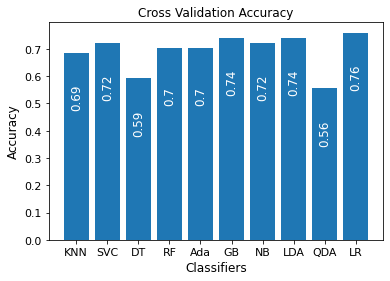

In [ ]:
import matplotlib.pyplot as plt
classifier=['KNN','SVC','DT','RF','Ada','GB','NB','LDA','QDA','LR']
y_pos = np.arange(len(classifier))
plt.bar(y_pos,np.array(accuracy))
ys=np.array(accuracy)
for index, value in enumerate(ys):
    plt.text(index-0.2,value-0.2, str(np.round(value,2)),rotation=90,color='white',fontsize=12)
plt.xticks(y_pos, classifier,fontsize=11)
plt.yticks(fontsize=11)
plt.ylabel('Accuracy',fontsize=12)
plt.xlabel('Classifiers',fontsize=12)
plt.title('Cross Validation Accuracy',fontsize=12)
plt.savefig('accuracy.svg',dip=300)